# House Price Prediction using Machine Learning Algorithms

Common tasks in supervised learning involve Classification and Regression. This project discusses a regression problem in which I attempt to predict house prices based on a number of features.

## The Data

Data has been taken from an ongoing competition in Kaggle.  The Ames Housing Dataset contains 79 predictors/features to predict the final price of houses in the test dataset. However, for this project, I have choosen only 14 predictors of which 5 are continuous and remaining 9 are categorical. 

## Objective

(i) To perform some basic Exploratory Data Analysis (EDA)  
(ii) To develop and compare the performances of some widely used machine learning algorithms  
(iii) To use the best performing algorithm for prediction in test dataset

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read dataset

In [2]:
# train dataset
train = pd.read_excel("/Users/nirajanbudhathoki/OneDrive - Central Michigan University/HouseP/train1.xlsx")

In [3]:
train.shape # 15 columns due to 'Id' Column

(1460, 15)

In [4]:
# test dataset
test = pd.read_excel("/Users/nirajanbudhathoki/OneDrive - Central Michigan University/HouseP/test1.xlsx")

In [5]:
test.shape  # test dataset won't obviously have the target column

(1459, 14)

### Variable Description 
Table below lists the variables used in this project. Variable type has been classified as either categorical or continuous although pandas has a further classification of continuous variables as 'float64'and 'int64' datatype while categorical variables are named 'object'. SalePrice is the target/response variable.

Variable Name|Label|Variable Type
:-----|:-----|:-----
HouseStyle|Style of dwelling|Categorical
BldgType|Type of dwelling|Categorical
LotFrontage|Linear feet of street connected to property|Continuous
LotArea|Lot size in square feet|Continuous
Street|Type of road access to property|Categorical
LotShape|General shape of property|Categorical
YearBuilt|Original construction date|Continuous
RoofStyle|Type of roof|Categorical
Foundation|Type of foundation|Categorical
CentralAir|Central air conditioning|Categorical
1stFlrSF|First Floor square feet|Continuous
BedroomAbvGr|Bedrooms above grade|Continuous
GarageType|Garage location|Categorical
SalePrice|The property's sale price in dollars|Continuous

### Create new column

A new column representing the age of houses has been created based on the existing column called 'Year Built'.

In [6]:
train['Age'] = 2021 - train['YearBuilt']

In [7]:
test['Age'] = 2021 - test['YearBuilt']

### Drop column

Column 'Year Built' will now be dropped and not considered for further analysis.

In [8]:
train = train.drop(['YearBuilt'],axis=1)

In [9]:
test = test.drop(['YearBuilt'],axis=1)

### Check for missing values

Displayed below is the number of missing values for each variables in the dataset.

In [10]:
train.isnull().sum() 

Id                0
HouseStyle        0
BldgType          0
LotFrontage     259
LotArea           0
Street            0
LotShape          0
RoofStyle         0
Foundation        0
CentralAir        0
1stFlrSF          0
BedroomAbvGr      0
GarageType       81
SalePrice         0
Age               0
dtype: int64

In [11]:
test.isnull().sum()

Id                0
HouseStyle        0
BldgType          0
LotFrontage     227
LotArea           0
Street            0
LotShape          0
RoofStyle         0
Foundation        0
CentralAir        0
1stFlrSF          0
BedroomAbvGr      0
GarageType       76
Age               0
dtype: int64

### Dealing with missing values

Various methods for dealing with missing values exist. In this study, missing value for categorical variable 'GarageType' will be replaced by the mode. Regarding 'LotFrontage', I used mean for imputation.

In [12]:
train['GarageType'].fillna(value=train['GarageType'].value_counts().index[0],inplace =True)

In [13]:
train = train.fillna({'LotFrontage':train['LotFrontage'].mean()})

In [14]:
test['GarageType'].fillna(value=test['GarageType'].value_counts().index[0],inplace =True)

In [15]:
test = test.fillna({'LotFrontage':test['LotFrontage'].mean()})

## EDA on Train Dataset

### Correlation coefficient between the target 'Sale Price' and continuous features

In [16]:
train.corr()['SalePrice'].sort_values(ascending=False)

SalePrice       1.000000
1stFlrSF        0.605852
LotFrontage     0.334901
LotArea         0.263843
BedroomAbvGr    0.168213
Id             -0.021917
Age            -0.522897
Name: SalePrice, dtype: float64

Features most positively correlated with Sale Price are the first floor area (square feet) followed by linear feet of the street connected to house. Age of the house has moderate negative correlation with the Sale Price.

### Distribution of SalePrice

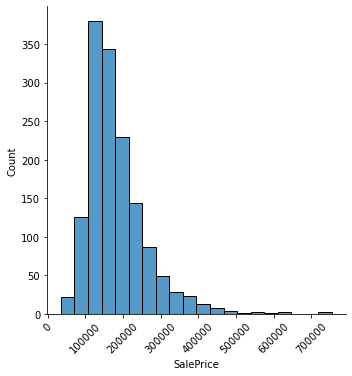

In [17]:
sns.displot(data = train, x="SalePrice",bins=20)
plt.xticks(rotation=45)
plt.show()

The distribution is positively (right) skewed. Most of the dataset on house price exhibit positive skewness.

In [18]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Since median < mean, we can see that the data is right-skewed.

### Distribution of Lot Frontage, Lot Area, 1stFlrSF

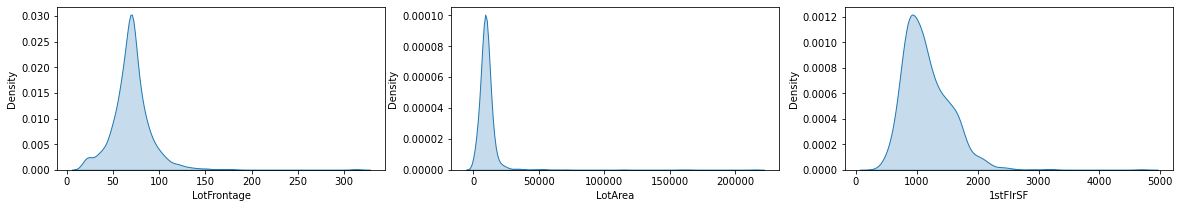

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(20, 3))
sns.kdeplot(data=train, ax=axes[0], x='LotFrontage',shade=True)
sns.kdeplot(data=train, ax=axes[1], x='LotArea',shade=True)
sns.kdeplot(data=train, ax=axes[2], x='1stFlrSF',shade=True)
plt.show()

All three plots do not seem to be deviated very much from a bell-shaped distribution. Tails on the right of these distributions may be due to outliers in the data.

### Distribution of Building Type, Lot Shape and Garage Type

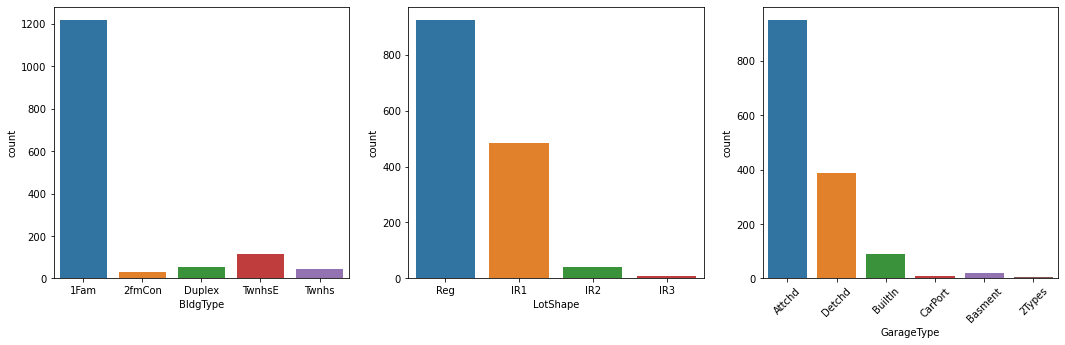

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(18,5))
sns.countplot(data=train, ax=axes[0], x='BldgType')
sns.countplot(data=train, ax=axes[1], x='LotShape')
sns.countplot(data=train, ax=axes[2], x='GarageType')
plt.xticks(rotation=45)
plt.show()

### Sale Price Vs House Style

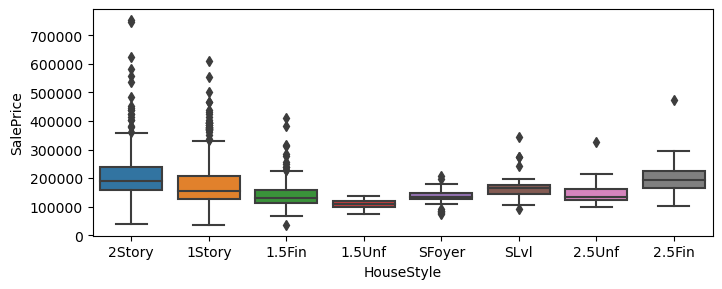

In [21]:
plt.figure(figsize=(8,3),dpi=100)
sns.boxplot(x="HouseStyle", y="SalePrice", data=train)
plt.show()

Median prices for two and one-half story: 2nd level finished houses (2.5 Fin) is the highest as shown by the plot and table below. There are obvious outliers in the dataset which demand separate treatment.

In [22]:
train.groupby('HouseStyle')["SalePrice"].median().sort_values(ascending=False)

HouseStyle
2.5Fin    194000
2Story    190000
SLvl      164500
1Story    154750
SFoyer    135960
2.5Unf    133900
1.5Fin    132000
1.5Unf    111250
Name: SalePrice, dtype: int64

### Sale Price Vs Roof Style

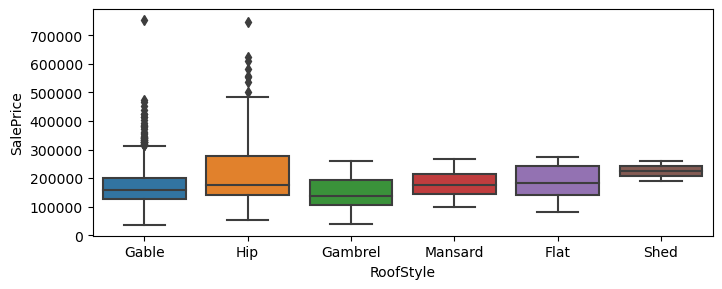

In [23]:
# boxplot of RoofStyle Vs SalePrice
plt.figure(figsize=(8,3),dpi=100)
sns.boxplot(x="RoofStyle", y="SalePrice", data=train)
plt.show()

Sale Price seem to vary with roofstyle. Median prices for houses with Shed roofstyle is the highest.

In [24]:
train.groupby('RoofStyle')["SalePrice"].median().sort_values(ascending=False)

RoofStyle
Shed       225000
Flat       185000
Hip        176500
Mansard    175000
Gable      160000
Gambrel    139000
Name: SalePrice, dtype: int64

### Sale Price Vs Lot Frontage

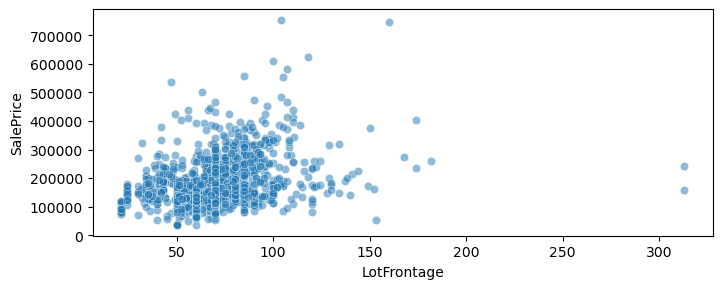

In [25]:
# Scatter plot 
plt.figure(figsize=(8,3),dpi=100)
sns.scatterplot(x='LotFrontage',y='SalePrice',data=train,alpha=0.5)
plt.show()

Somewhat positive correlation is seen between Sale Price and Lot Frontage. Some outliers may also be noted from the plot.

In [26]:
# Checking if the correlation is statistically significant at 5% level of siginificance

In [27]:
import scipy.stats

In [28]:
scipy.stats.pearsonr(train['LotFrontage'],train['SalePrice'])  # Pearson correlation coefficient and the p-value

(0.33490085154055127, 1.3466505607154999e-39)

Since p-value is very small, we can say that the correlation is statistically significant. In other words, it is significantly different from zero.

### Sale Price Vs 1stFlrSF

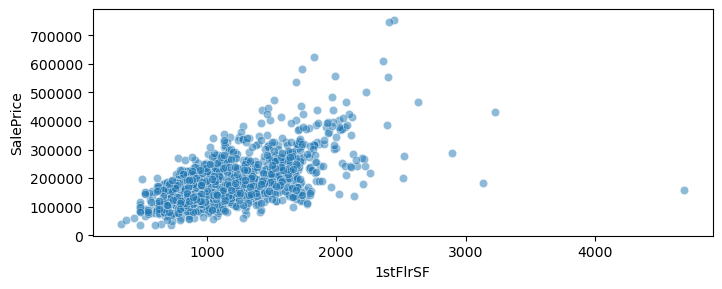

In [29]:
plt.figure(figsize=(8,3),dpi=100)
sns.scatterplot(x='1stFlrSF',y='SalePrice',data=train,alpha=0.5)
plt.show()

As already noted, there is a positive correlation between first floor square feet and Sale Price.

### Sale Price Vs Age by Central Air Conditioning

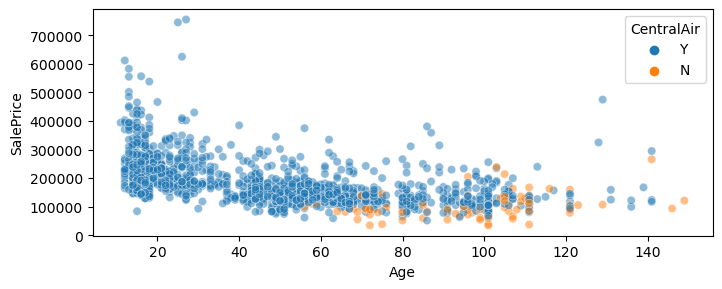

In [30]:
plt.figure(figsize=(8,3),dpi=100)
sns.scatterplot(x='Age',y='SalePrice',data=train,alpha=0.5,hue='CentralAir')
plt.show()

Age of the house has negative correlation with the sale price. Most of the house with no central air system are around 50 or more years older and are priced low in general.

Now that we explored some relationships among variables, the remaining section focuses on building machine learning models.

In [31]:
total = pd.concat([train, test], axis = 0)  # Concatenate train and test dataset

In [32]:
total.shape

(2919, 15)

In [33]:
total.isnull().sum()  # SalePrice for test dataset are all missing after concatenation. These will be dropped.

Id                 0
HouseStyle         0
BldgType           0
LotFrontage        0
LotArea            0
Street             0
LotShape           0
RoofStyle          0
Foundation         0
CentralAir         0
1stFlrSF           0
BedroomAbvGr       0
GarageType         0
SalePrice       1459
Age                0
dtype: int64

### Coding categorical features

In [34]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   HouseStyle    2919 non-null   object 
 2   BldgType      2919 non-null   object 
 3   LotFrontage   2919 non-null   float64
 4   LotArea       2919 non-null   int64  
 5   Street        2919 non-null   object 
 6   LotShape      2919 non-null   object 
 7   RoofStyle     2919 non-null   object 
 8   Foundation    2919 non-null   object 
 9   CentralAir    2919 non-null   object 
 10  1stFlrSF      2919 non-null   int64  
 11  BedroomAbvGr  2919 non-null   int64  
 12  GarageType    2919 non-null   object 
 13  SalePrice     1460 non-null   float64
 14  Age           2919 non-null   int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 364.9+ KB


Columns of 'object' data type will be extracted to get dummy variables for modeling purposes.

In [35]:
obj_df = total.select_dtypes(include=['object']).copy()
cat_cols = obj_df.columns

In [36]:
total_dummies = pd.get_dummies(data = total, columns = cat_cols, drop_first =True)
total_dummies

,Id,LotFrontage,LotArea,1stFlrSF,BedroomAbvGr,SalePrice,Age,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,CentralAir_Y,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd
0,1,65.0,8450,856,3,208500.0,18,0,0,0,...,1,0,0,0,1,1,0,0,0,0
1,2,80.0,9600,1262,3,181500.0,45,0,1,0,...,0,0,0,0,1,1,0,0,0,0
2,3,68.0,11250,920,3,223500.0,20,0,0,0,...,1,0,0,0,1,1,0,0,0,0
3,4,60.0,9550,961,3,140000.0,106,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,5,84.0,14260,1145,4,250000.0,21,0,0,0,...,1,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,21.0,1936,546,3,NaN,51,0,0,0,...,0,0,0,0,1,1,0,0,0,0
1455,2916,21.0,1894,546,3,NaN,51,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1456,2917,160.0,20000,1224,4,NaN,61,0,1,0,...,0,0,0,0,1,0,0,0,0,1
1457,2918,62.0,10441,970,3,NaN,29,0,0,0,...,1,0,0,0,1,1,0,0,0,0


In [37]:
df_train=total_dummies.iloc[:1460,1:]  #excludes Id column which is not required for prediction
df_train

,LotFrontage,LotArea,1stFlrSF,BedroomAbvGr,SalePrice,Age,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,CentralAir_Y,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd
0,65.0,8450,856,3,208500.0,18,0,0,0,0,...,1,0,0,0,1,1,0,0,0,0
1,80.0,9600,1262,3,181500.0,45,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0
2,68.0,11250,920,3,223500.0,20,0,0,0,0,...,1,0,0,0,1,1,0,0,0,0
3,60.0,9550,961,3,140000.0,106,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,84.0,14260,1145,4,250000.0,21,0,0,0,0,...,1,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,953,3,175000.0,22,0,0,0,0,...,1,0,0,0,1,1,0,0,0,0
1456,85.0,13175,2073,3,210000.0,43,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0
1457,66.0,9042,1188,4,266500.0,80,0,0,0,0,...,0,0,1,0,1,1,0,0,0,0
1458,68.0,9717,1078,2,142125.0,71,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0


In [38]:
df_test=total_dummies.iloc[1460:,:]
df_test=df_test.drop('SalePrice',axis=1)
df_test

,Id,LotFrontage,LotArea,1stFlrSF,BedroomAbvGr,Age,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,CentralAir_Y,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd
0,1461,80.0,11622,896,2,60,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0
1,1462,81.0,14267,1329,3,63,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0
2,1463,74.0,13830,928,3,24,0,0,0,0,...,1,0,0,0,1,1,0,0,0,0
3,1464,78.0,9978,926,3,23,0,0,0,0,...,1,0,0,0,1,1,0,0,0,0
4,1465,43.0,5005,1280,2,29,0,1,0,0,...,1,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,21.0,1936,546,3,51,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
1455,2916,21.0,1894,546,3,51,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1456,2917,160.0,20000,1224,4,61,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
1457,2918,62.0,10441,970,3,29,0,0,0,0,...,1,0,0,0,1,1,0,0,0,0


### Machine Learning Models

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

### Multiple Linear Regression

The most basic model developed is a multiple linear regression model. A multiple linear regression has a continuous target variable and several predictors. The model works by minimizing the sum of squared errors.  
For all modeling purposes, data have been splitted into training (85%) and test (15%) set. To estimate the performance of the developed model on unseen (test) data, a 10-fold cross-validation has been performed.

In [40]:
# Extracting X (features) and y (response) from df_train for modeling
X = df_train.drop('SalePrice', axis =1)
y=df_train["SalePrice"]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [42]:
## Scaling
scaler = StandardScaler()

In [43]:
X_train = scaler.fit_transform(X_train)

In [44]:
X_test = scaler.transform(X_test)

In [45]:
lr= LinearRegression()

In [46]:
scores = cross_val_score(lr,X_train,y_train,scoring = 'neg_root_mean_squared_error',cv=10)

In [47]:
scores

array([-40275.61319709, -43003.80190044, -41952.74765294, -36212.42341016,
       -53485.29663744, -37888.94747175, -50546.43569187, -34097.67271336,
       -35139.29700971, -39293.7788085 ])

In [48]:
abs(scores.mean())

41189.6014493243

In [49]:
lr.fit(X_train,y_train)

LinearRegression()

In [50]:
y_pred = lr.predict(X_test)

In [51]:
mae = mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error from Linear Regression:", mae)

Mean Absolute Error from Linear Regression: 31200.17128702066


In [52]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error from Linear Regression:", rmse)

Root Mean Squared Error from Linear Regression: 60014.04137206123


### Ridge Regression

Ridge regression is often helpful when there are large number of predictors and are multicollinear. This method minimizes the sum of squared errors (just like the multiple linear regression above) plus a penalty term. It helps reducing the potential for overfitting to the data. Following the bias-variance trade-off, ridge regression works by allowing some bias in the training data so that variance is reduced while making predictions. As the value of tuning parameter alpha increases, the model complexity reduces. Though higher values of alpha reduce overfitting, significantly high values can cause underfitting as well.

In [53]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [54]:
mod_ridge = Ridge(random_state=101)

In [55]:
param_grid = {'alpha':[0.01,0.1,0.5,1,2,5]}

In [56]:
grid_model_ridge = GridSearchCV(estimator=mod_ridge,
                         param_grid=param_grid,
                         scoring = 'neg_root_mean_squared_error',
                         cv=10,verbose=1)

In [57]:
grid_model_ridge.fit(X_train,y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.1s finished


GridSearchCV(cv=10, estimator=Ridge(random_state=101),
             param_grid={'alpha': [0.01, 0.1, 0.5, 1, 2, 5]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [58]:
grid_model_ridge.best_params_, grid_model_ridge.best_score_ 

({'alpha': 5}, -41161.49651390447)

In [59]:
y_pred = grid_model_ridge.predict(X_test)

In [60]:
mae = mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error from Ridge Regression:", mae)

Mean Absolute Error from Ridge Regression: 31133.250283353882


In [61]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error from Ridge Regression:", rmse)

Root Mean Squared Error from Ridge Regression: 59787.40503957871


### K Nearest Neighbors

This is a simple, easy-to-use algorithm that assumes similar things exist is close proximity. Using k number of closest data points (neighbors) where 'close' is defined using some distance matrix, predictions are made for a particular data point. This number 'k' has an important role in the algorithm and is chosen using cross-validation from a range of values.

In [71]:
from sklearn.neighbors import KNeighborsRegressor

In [72]:
knn_mod = KNeighborsRegressor()

In [73]:
k_range = list(range(1,21))

In [74]:
param_grid = dict(n_neighbors = k_range)

In [75]:
grid_model_knn = GridSearchCV(estimator=knn_mod,
                         param_grid=param_grid,
                         scoring = 'neg_root_mean_squared_error',
                         cv=10,verbose=1)

In [76]:
grid_model_knn.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.4s finished


GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [77]:
grid_model_knn.best_params_, grid_model_knn.best_score_  

({'n_neighbors': 10}, -46868.63186496632)

In [78]:
y_pred_knn = grid_model_knn.predict(X_test)

In [79]:
mae = mean_absolute_error(y_test,y_pred_knn)
print("Mean Absolute Error from KNN Regression:", "{:.3f}".format(mae))

Mean Absolute Error from KNN Regression: 30993.492


In [80]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred_knn))
print("Root Mean Squared Error from KNN Regression:", "{:.3f}".format(rmse))

Root Mean Squared Error from KNN Regression: 46571.273


### Random Forest

This technique involve building several decision trees on bootstrapped training samples. When these trees are built, only a random sample of m predictors are chosen as split candidates from a full set of p predictors (m<p). The n_estimators argument specifies the number of trees in the forest. More trees will induce computational complexity of the algorithm. The max_depth of a tree is the longest path between the root node and the leaf node.

In [81]:
from sklearn.ensemble import RandomForestRegressor

In [82]:
rf_mod=RandomForestRegressor(random_state=111)

In [83]:
param_grid = { 
    'n_estimators': [100,200,300,500],
    'max_depth' : [4,5,6,7,8],
}

In [84]:
grid_model_rf = GridSearchCV(estimator=rf_mod,
                         param_grid=param_grid,
                         scoring = 'neg_root_mean_squared_error',
                         cv=10,verbose=1)

In [85]:
grid_model_rf.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  1.7min finished


GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=111),
             param_grid={'max_depth': [4, 5, 6, 7, 8],
                         'n_estimators': [100, 200, 300, 500]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [86]:
grid_model_rf.best_params_, grid_model_rf.best_score_  

({'max_depth': 8, 'n_estimators': 500}, -36565.57536248879)

In [87]:
y_pred_rf = grid_model_rf.predict(X_test)

In [88]:
mae = mean_absolute_error(y_test,y_pred_rf)
print("Mean Absolute Error from Random Forest Regressor:", "{:.3f}".format(mae))

Mean Absolute Error from Random Forest Regressor: 24616.958


In [89]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred_rf))
print("Root Mean Squared Error from Random Forest Regressor:","{:.3f}".format(rmse))

Root Mean Squared Error from Random Forest Regressor: 40329.539


### XGBoost

XGBoost stands for eXtreme Gradient Boosted Trees. Boosting attempts to accurately predict a target variable by combining the estimates of a set of simpler models. XGBoost improves model performances and computational speed and that's why it is one of the popular choice in machine learning. The algorithm below requires specification of the number of gradient boosted trees (n_estimators), maximum tree depth and the boosting learning rate, also called shrinkage. Smaller learning rate requires more trees to be added to the model.

In [90]:
from xgboost import XGBRegressor

In [91]:
xgb_mod = XGBRegressor(random_state=101)

In [92]:
param_grid = {
    'n_estimators':[100,200,300,500],
    'max_depth':[4,5,6,7,8],
    'learning_rate':[0.2,0.1,0.05,0.01]
}

In [93]:
grid_model_xgb = GridSearchCV(estimator=xgb_mod,
                         param_grid=param_grid,
                         scoring = 'neg_root_mean_squared_error',
                         cv=10,verbose=1)

In [94]:
grid_model_xgb.fit(X_train,y_train)

Fitting 10 folds for each of 80 candidates, totalling 800 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:  4.4min finished


GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=101,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_para

In [95]:
grid_model_xgb.best_params_, grid_model_xgb.best_score_  

({'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200},
 -35360.04421313682)

In [96]:
y_pred_xgb = grid_model_xgb.predict(X_test)

In [97]:
mae = mean_absolute_error(y_test,y_pred_xgb)
print("Mean Absolute Error from XGBoost:", "{:.3f}".format(mae))

Mean Absolute Error from XGBoost: 21221.316


In [98]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred_xgb))
print("Root Mean Squared Error from XGBoost:","{:.3f}".format(rmse))

Root Mean Squared Error from XGBoost: 32652.667


### Support Vector Regressor

Support vector machines (SVM) are widely used in classification problems although they can be used for regression as well. SVM tries to find a line/hyperplane (in multidimensional space) that separates classes for classification problems. Support vector regression (SVR) considers the points that are within the decision boundary line. The line/hyperplane that has maximum number of points is considered the best. This method uses a kernel which transforms linearly inseparable data to separable data by adding more dimensions to it. Another parameter C is called regularization parameter where the strength of the regularization is inversely proportional to C. C must be strictly positive. Gamma specifies the kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’ kernel.

In [99]:
from sklearn.svm import SVR

In [100]:
svr_mod = SVR()

In [101]:
param_grid = {
    'kernel':['linear','rbf'],
    'C': [0.01,0.1,1,5,10,50,100],
    'gamma':['auto','scale'],
}

In [102]:
grid_model_svr = GridSearchCV(estimator=svr_mod,
                         param_grid=param_grid,
                         scoring = 'neg_root_mean_squared_error',
                         cv=10,verbose=1)

In [103]:
grid_model_svr.fit(X_train,y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:   12.4s finished


GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 1, 5, 10, 50, 100],
                         'gamma': ['auto', 'scale'],
                         'kernel': ['linear', 'rbf']},
             scoring='neg_root_mean_squared_error', verbose=1)

In [104]:
grid_model_svr.best_params_, grid_model_svr.best_score_  

({'C': 100, 'gamma': 'auto', 'kernel': 'linear'}, -48688.92351486803)

In [105]:
y_pred_svr = grid_model_svr.predict(X_test)

In [106]:
mae = mean_absolute_error(y_test,y_pred_svr)
print("Mean Absolute Error from Support Vector Regression:", "{:.3f}".format(mae))

Mean Absolute Error from Support Vector Regression: 30353.509


In [107]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred_svr))
print("Root Mean Squared Error from Support Vector Regression:", "{:.3f}".format(rmse))

Root Mean Squared Error from Support Vector Regression: 53120.008


## Choosing the best performing model

Various performance metrics are available for selecting the best regression model. I used mean absolute error and root mean squared error for this study: lower the better. Based on the values of these measures, the XGBoost model has been choosen as the best model and will be used for prediction in the test dataset.

In [108]:
final_model = XGBRegressor(n_estimators=200, max_depth=5,learning_rate=0.05,random_state=101)

In [109]:
final_model.fit(X,y)  # the final model will now be trained using whole training dataset

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=8, num_parallel_tree=1, random_state=101,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

## Using the best model to make predictions

In [110]:
from joblib import dump,load

In [111]:
dump(final_model, 'model_for_pred.joblib')

['model_for_pred.joblib']

In [112]:
loaded_model = load('model_for_pred.joblib')

In [113]:
predicted_price = loaded_model.predict(df_test.iloc[:,1:])

In [114]:
predicted_price

array([119166.02, 167582.08, 204373.34, ..., 173318.7 , 148891.38,
       208725.25], dtype=float32)

In [115]:
output = pd.DataFrame({'Id': df_test['Id'], 'SalePrice': predicted_price})

In [116]:
print(output.to_string(index=False))

   Id      SalePrice
 1461  119166.023438
 1462  167582.078125
 1463  204373.343750
 1464  210011.281250
 1465  182088.656250
 1466  195827.640625
 1467  172109.296875
 1468  182812.437500
 1469  188204.781250
 1470  115560.515625
 1471  194660.453125
 1472   98229.195312
 1473   95075.921875
 1474  142648.093750
 1475  119133.718750
 1476  386228.781250
 1477  266666.500000
 1478  279066.000000
 1479  327439.937500
 1480  491226.125000
 1481  360509.625000
 1482  206039.265625
 1483  174608.500000
 1484  168043.265625
 1485  155581.343750
 1486  201393.953125
 1487  366450.500000
 1488  237771.750000
 1489  238331.078125
 1490  228182.062500
 1491  199532.609375
 1492   85860.757812
 1493  200257.406250
 1494  296923.781250
 1495  286868.250000
 1496  231832.843750
 1497  168776.703125
 1498  159252.125000
 1499  154798.796875
 1500  154798.796875
 1501  170064.546875
 1502  152338.046875
 1503  281986.687500
 1504  198206.250000
 1505  216165.265625
 1506  189686.203125
 1507  288159

### Conclusion

This study attempted to predict house prices using a set of features from the Ames Housing Dataset. Relationships explored during EDA indicated the relevance of features in making predictions. The training dataset was used to build several machine learning models and tested on a fraction of the same dataset. Among all the models, XGBoost was picked as the best performing model based on the choosen performance metrics. Finally, the same model was used to make predictions of house prices in the test dataset. A further step in this study may be to build neural nets or more advanced models to see if predictions can be made with even less errors.